# Curve fitting

## get x y

In [2]:

def get_xy():
    x = y = []
    size = int(input("Enter size: "))
    #take values with space and append to x and y list at once
    x = input("Enter x values: ").split()
    y = input("Enter y values: ").split()
    #convert string to int
    x = [float(i) for i in x]
    y = [float(i) for i in y]

    print("x: ",x)
    print("y: ",y)
    return x,y

## straight line

a =  0.1879310344827586
b =  2.2758620689655173
fitting: y = 109/580 + 66/29x  for your data...



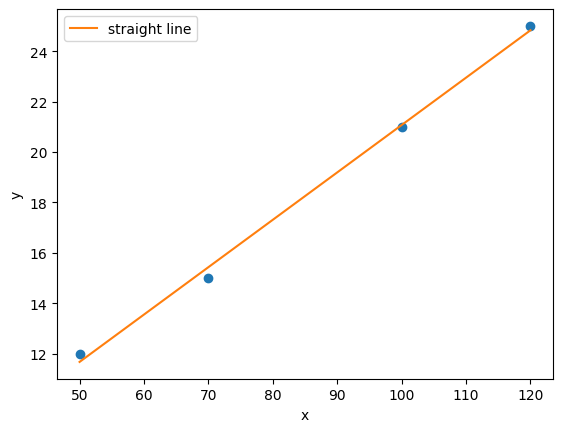

In [3]:

def st_line():
     
    from sympy import Eq, solve, symbols

    way = input("which values of x and y?(d for default , input): ")
    if way == 'd':
        x  = [50,70,100,120]
        y = [12,15,21,25]
    else:
        x, y = get_xy()

    #calculate the sum of x, y, x^2, xy, n
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum([i**2 for i in x])
    sum_xy = sum([x[i]*y[i] for i in range(len(x))])
    n = len(x)

    #define the system of equations
    a,b = symbols('a b')
    eq1 = Eq(a*sum_x + n*b, sum_y)
    eq2 = Eq(a*sum_x2 + b*sum_x, sum_xy)

    #solve eqs and calculate the fitted values
    sol = solve((eq1,eq2), (a,b))
    a, b = sol[a], sol[b]
    print("a = ",float(a))
    print("b = ", float(b))

    f_x = [b + a*i for i in x]
    print("fitting: y = {} + {}x  for your data...\n".format(a,b))

    #plot the data and the fit
    import matplotlib.pyplot as plt
    plt.plot(x,y, 'o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, f_x, label = 'straight line')
    plt.legend()

st_line()


## parabola

x:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
y:  [10.0, 8.0, 4.0, 1.0, 4.0, 8.0, 10.0]
a =  0.8571428571428571
b =  -6.857142857142857
c =  16.714285714285715
fitting: y = 0.857142857142857 + -6.85714285714286x + 16.7142857142857x^2 for your data...



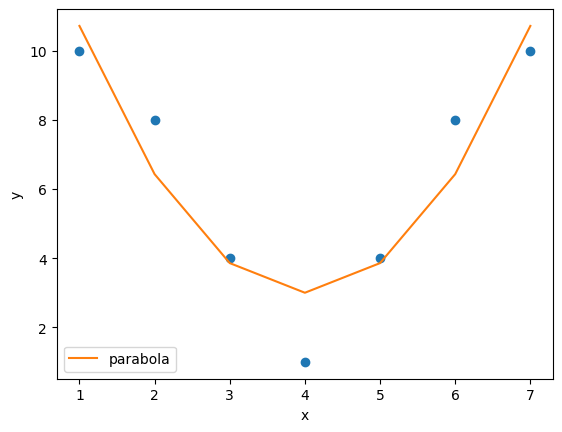

In [6]:
def parabola():

    from sympy import Eq, solve, symbols

    way = input("which values of x and y?(d for default,input): ")
    if way == 'd':
        x = [1,2,3,4,5]
        y = [10,12,13,16,19]
    else:
        x, y = get_xy()

    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum([i**2 for i in x])
    sum_x3 = sum([i**3 for i in x])
    sum_x4 = sum([i**4 for i in x])
    sum_xy = sum([x[i]*y[i] for i in range(len(x))])
    sum_x2y = sum([x[i]**2*y[i] for i in range(len(x))])
    n = len(x)

    a,b,c = symbols('a b c')
    eq1 = Eq(a*sum_x2 + b*sum_x + n*c, sum_y)
    eq2 = Eq(a*sum_x3 + b*sum_x2 + c*sum_x, sum_xy)
    eq3 = Eq(a*sum_x4 + b*sum_x3 + c*sum_x2, sum_x2y)

    sol = solve((eq1,eq2,eq3), (a,b,c))
    a, b, c = sol[a], sol[b], sol[c]
    print("a = ",float(a))
    print("b = ", float(b))
    print("c = ", float(c))

    f_x = [c + b*i + a*i**2 for i in x]
    print("fitting: y = {} + {}x + {}x^2 for your data...\n".format(a,b,c))

    #plot the data and the fit
    import matplotlib.pyplot as plt
    plt.plot(x,y,'o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, f_x, label = 'parabola')
    plt.legend()

parabola()
    

## curve y =  a*e^(bx)

a =  1.2019337084952928
b =  0.00960267559214067
fitting: y = 1.2019337084952928e^(0.00960267559214067x) for your data...



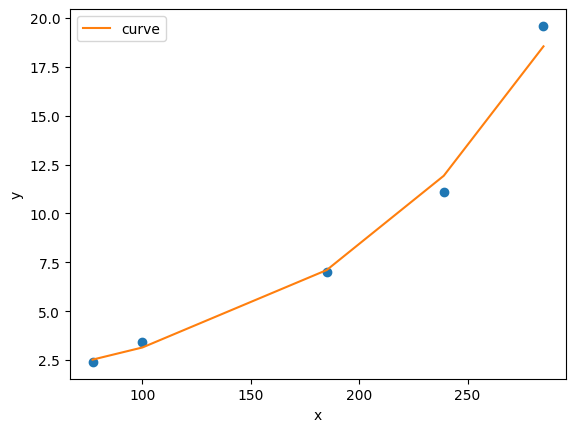

In [ ]:
#fit the data with a curve y = a*e^(bx)
def curve():
    
    import math
    from sympy import symbols, Eq, solve

    way = input("which values of x and y?(d for default,input): ")
    if way == 'd':
        x = [77,100,185,239,285]
        y = [2.4,3.4,7.0,11.1,19.6] 
    else:
        x, y = get_xy()

    #convert y to log(y) and calculate the sum of x, y, x^2, xy, n
    x = x
    Y = [math.log(i) for i in y]
    sum_y = sum(Y)
    sum_x = sum(x)
    sum_xy = sum([x[i]*Y[i] for i in range(len(x))])
    sum_x2 = sum([i**2 for i in x])
    n = len(x)

    #define the system of equations
    a,b = symbols('a b')
    eq1 = Eq(a*n + b*sum_x, sum_y)
    eq2 = Eq(a*sum_x + b*sum_x2, sum_xy)

    #solve eqs and calculate the fitted values
    sol = solve((eq1,eq2), (a,b)) #A, B
    a, b = sol[a], sol[b]
    a = math.exp(a)
    b = b
    print("a = ", a)
    print("b = ", b)

    f_x = [a*math.exp(b*i) for i in x]
    print("fitting: y = {}e^({}x) for your data...\n".format(a,b))

    #plot the data and the fit
    import matplotlib.pyplot as plt
    plt.plot(x,y,'o')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, f_x, label = 'curve')
    plt.legend()

curve()